## 决策分类树 

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import graphviz   
%matplotlib inline

In [2]:
def create_data():
    iris = pd.read_csv('~/Desktop/Jupyter/统计机器学习实验/实验3/iris.data')
    data = np.array(iris)
    return data[:, :-1], data[:, -1]

X1, y1 = create_data()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=24)

In [3]:
transfer = StandardScaler()
X1_train = transfer.fit_transform(X1_train)
X1_test = transfer.transform(X1_test)

In [4]:
estimator1 = DecisionTreeClassifier(criterion='gini', max_depth=4)
estimator1.fit(X1_train, y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
print("模型测试准确率:{:.2%}".format(estimator1.score(X1_test, y1_test)))
scores = cross_val_score(estimator1, X1_train, y1_train, cv=10)
print("交叉验证模型训练准确率:\n", scores.reshape(2, 5))  
print("交叉验证模型最终训练准确率: {:.2%}".format(scores.mean()))

模型测试准确率:100.00%
交叉验证模型训练准确率:
 [[0.83333333 1.         1.         1.         0.91666667]
 [1.         0.91666667 0.91666667 0.91666667 0.91666667]]
交叉验证模型最终训练准确率: 94.17%


In [6]:
tree_pic = export_graphviz(estimator1, out_file="classifierTree.pdf")
with open('classifierTree.pdf') as f:
    dot_graph = f.read()

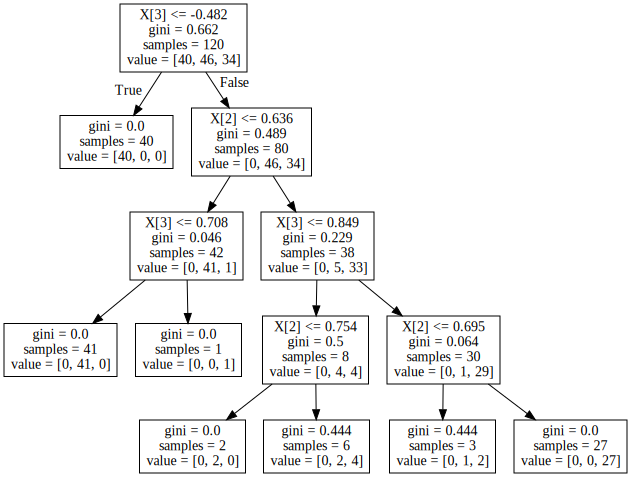

In [7]:
graphviz.Source(dot_graph)

## 决策回归树

In [8]:
def create_data():
    wine = pd.read_csv('~/Desktop/Jupyter/统计机器学习实验/实验3/wine.data')
    data = np.array(wine)
    return data[:, 1:], data[:, 0]

X2, y2 = create_data()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=24)

In [9]:
transfer = StandardScaler()
X2_train = transfer.fit_transform(X2_train)
X2_test = transfer.transform(X2_test)

In [10]:
estimator2 = DecisionTreeRegressor(criterion='mse', max_depth=5)
estimator2.fit(X2_train, y2_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [11]:
print("模型测试准确率:{:.2%}".format(estimator2.score(X2_test, y2_test)))
scores = cross_val_score(estimator2, X2_train, y2_train, cv=10)
print("交叉验证模型训练准确率:\n", scores.reshape(2, 5))  
print("交叉验证模型最终训练准确率: {:.2%}".format(scores.mean()))

模型测试准确率:95.24%
交叉验证模型训练准确率:
 [[0.90853659 0.85576923 1.         0.80689655 0.71134021]
 [1.         1.         0.80689655 0.87037037 0.81578947]]
交叉验证模型最终训练准确率: 87.76%


In [12]:
tree_pic = export_graphviz(estimator2, out_file="RegressorTree.pdf")
with open('RegressorTree.pdf') as f:
    dot_graph = f.read()

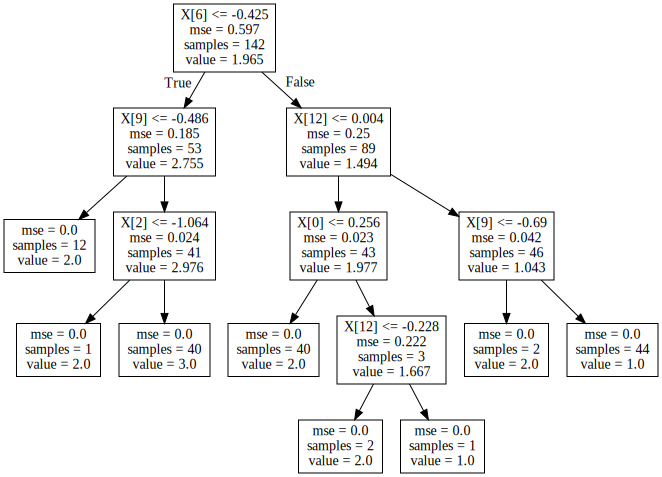

In [13]:
graphviz.Source(dot_graph)